In [1]:
import pandas as pd
import numpy as np

In [4]:
data = "C:/Users/Titanic/train.csv"
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
median_age = df["Age"].median()
median_age

28.0

In [10]:
#replacing missing data in the age column with the median
df['Age'].replace(np.nan, median_age, inplace=True)

In [11]:
#dropping low correllation column
df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)

In [12]:
#Dropping to 2 missing rows in the Embarked column
df.dropna(subset = ['Embarked'], axis = 0, inplace = True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
dup_rows = df.duplicated().sum()
dup_rows

116

In [16]:
#Dropping duplicate rows
df = df.drop_duplicates()

In [17]:
df.shape

(773, 8)

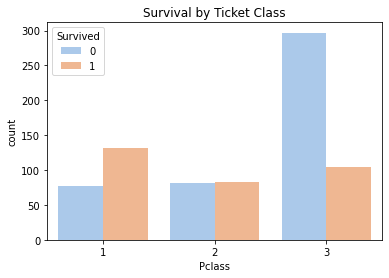

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
#Survived by Ticket Class
sns.countplot(data= df, x = 'Pclass',  hue= 'Survived')
plt.title('Survival by Ticket Class');

Text(0.5, 1.0, 'Survival by Age')

<Figure size 576x432 with 0 Axes>

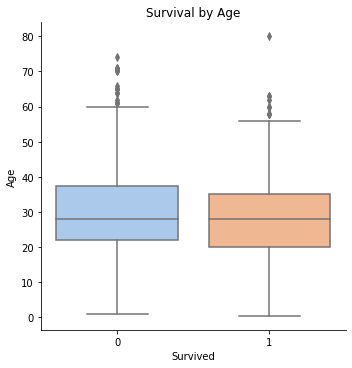

In [24]:
plt.figure(figsize=(8,6))
sns.catplot(data=df, x="Survived", y="Age", kind="box")
plt.title('Survival by Age')

In [26]:
train_data = df.copy()

In [27]:
#Declaring Variables
y_train = train_data["Survived"]
x_train = train_data.drop(columns='Survived')

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [29]:
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("cat_encoder", OneHotEncoder(sparse=False))])

In [30]:
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Embarked', 'Sex']

In [31]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [32]:
X_train = preprocess_pipeline.fit_transform(x_train[num_attribs + cat_attribs])
X_train

array([[ 0.88090573, -0.54861892,  0.47405518, ...,  1.        ,
         0.        ,  1.        ],
       [-1.46716368,  0.61735961,  0.47405518, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88090573, -0.25712429, -0.53543423, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.88090573, -0.11137697,  0.47405518, ...,  1.        ,
         1.        ,  0.        ],
       [-1.46716368, -0.25712429, -0.53543423, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.88090573,  0.18011766, -0.53543423, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [773, 618]

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = forest_clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [38]:
train_test_full_error = pd.concat([measure_error(y_test, y_pred, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.774194
precision,0.800000
recall,0.727273
f1,0.761905


In [41]:
from sklearn.model_selection import GridSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# The grid search object
GV_GBC = GridSearchCV(RandomForestClassifier(random_state=1), 
                      param_grid= hyperparameter_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(x_train, y_train)

In [42]:
GV_GBC.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=7, n_estimators=50,
                       random_state=1)

In [43]:
Y_test_pred_GV_GBC =GV_GBC.predict(x_test)
train_test_full_error = pd.concat([measure_error(y_test, Y_test_pred_GV_GBC, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.825806
precision,0.916667
recall,0.714286
f1,0.802920


In [39]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")

svm_clf.fit(x_train, y_train)

SVC(gamma='auto')

In [45]:
prediction = svm_clf.predict(x_test)

In [46]:
train_test_full_error = pd.concat([measure_error(y_test, prediction, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.845161
precision,0.934426
recall,0.740260
f1,0.826087
